<center><h1>Melkonian_Michael_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [2]:
'''
Name: Michael Melkonian
Github Username: MichaelMelkonian
USC ID: 4559397107

'''

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.io import arff
import warnings
import matplotlib.pyplot as plt
import math
import os


Get the Vertebral Column Data Set

In [4]:

data, metadata = arff.loadarff('./data/vertebral_column_data/column_2C_weka.arff')
print(pd.DataFrame(data))

new = pd.DataFrame(data).corr(method='spearman')
print(new)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis        class  
0        98.672917                 -0.2

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

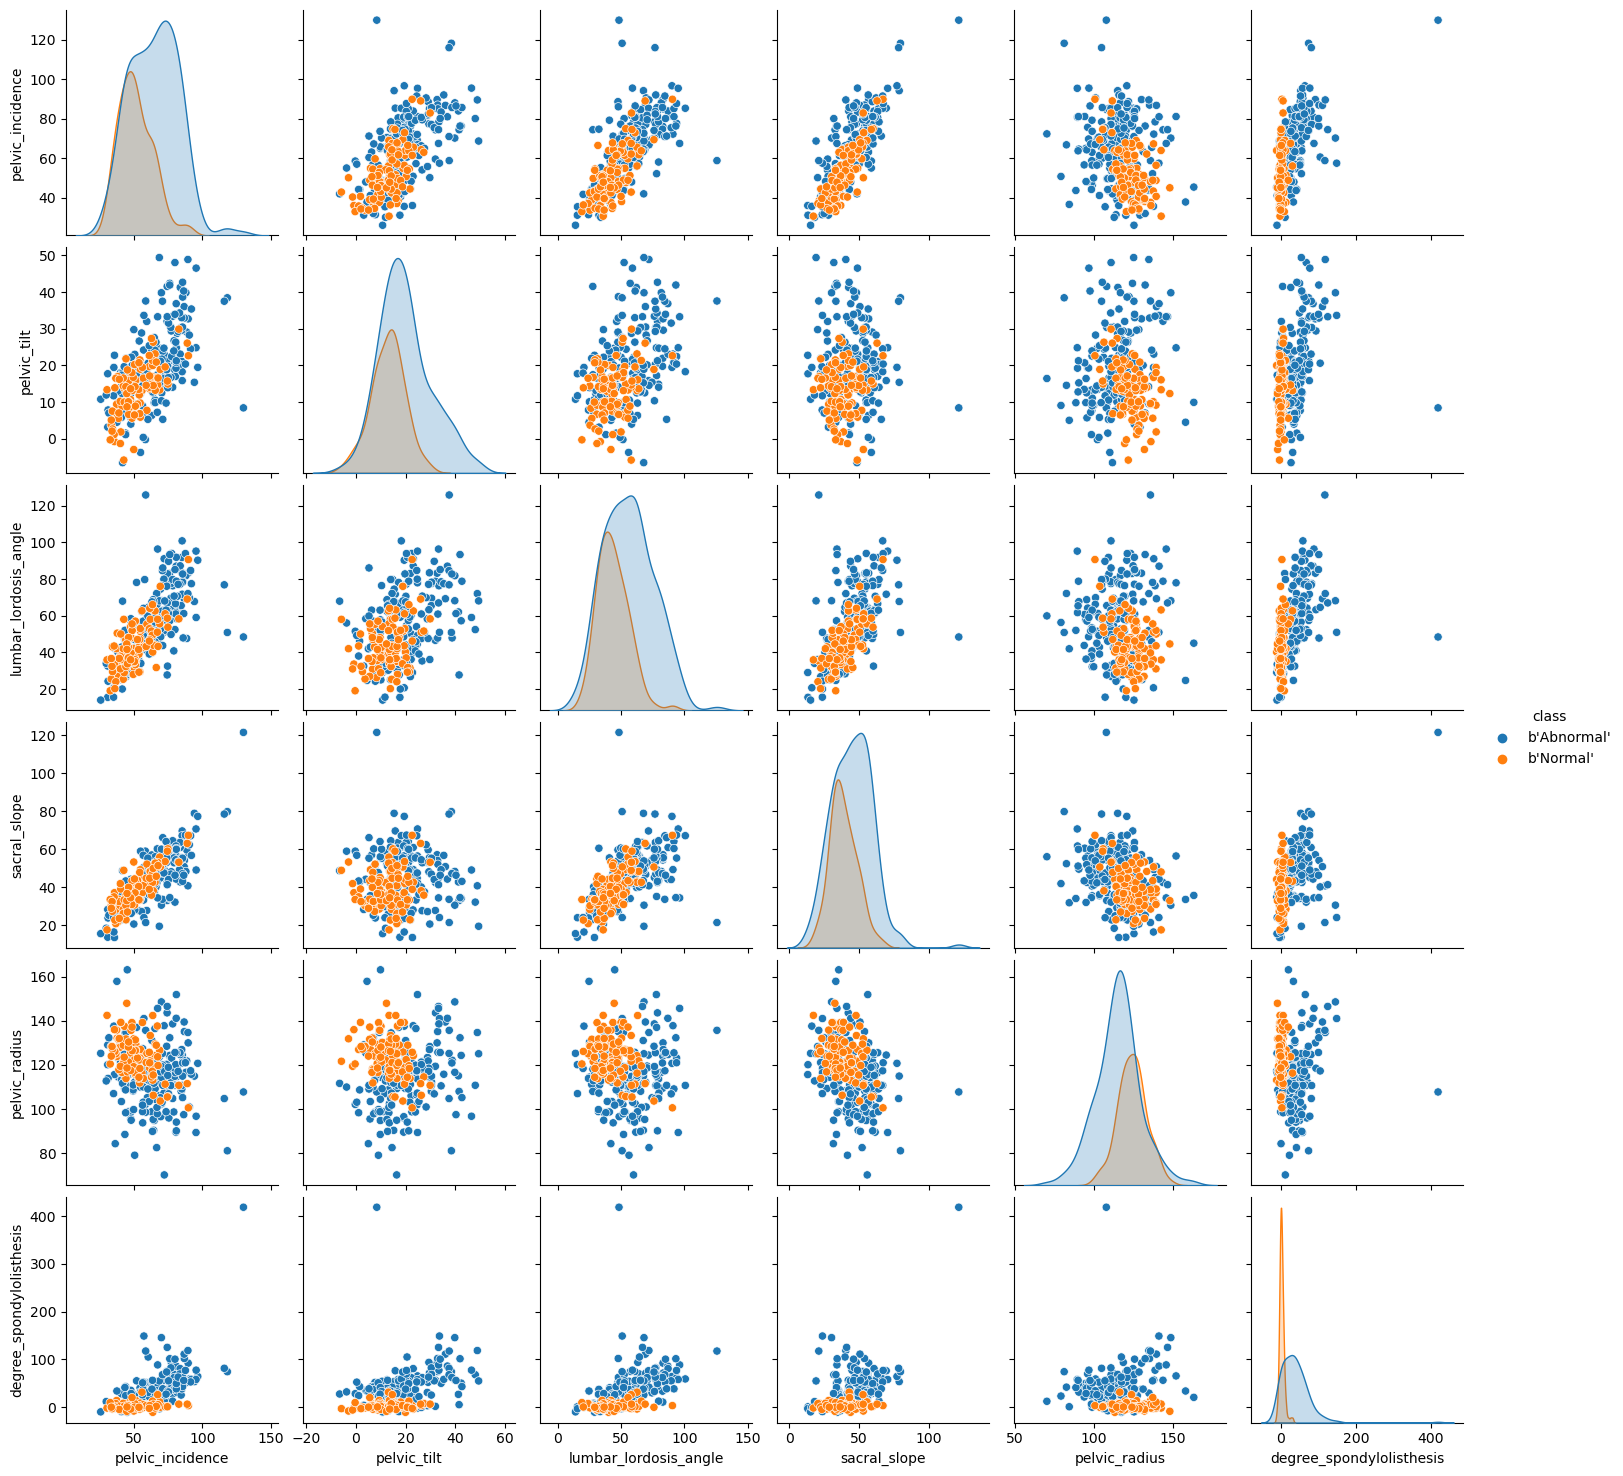

In [3]:
sns.pairplot(pd.DataFrame(data),hue='class')
plt.show()

#### ii. Boxplots

In [1]:
sns.boxplot(x="class",y="pelvic_incidence",data=pd.DataFrame(data))
plt.title("Pelvic Incidence vs Class")
plt.show()

sns.boxplot(x="class",y="pelvic_tilt",data=pd.DataFrame(data))
plt.title("Pelvic Tilt vs Class")
plt.show()

sns.boxplot(x="class",y="lumbar_lordosis_angle",data=pd.DataFrame(data))
plt.title("Lumbar Lordosis Angle vs Class")
plt.show()

sns.boxplot(x="class",y="sacral_slope",data=pd.DataFrame(data))
plt.title("Sacral Slope vs Class")
plt.show()

sns.boxplot(x="class",y="pelvic_radius",data=pd.DataFrame(data))
plt.title("Pelvic Radius vs Class")
plt.show()

sns.boxplot(x="class",y="degree_spondylolisthesis",data=pd.DataFrame(data))
plt.title("Degree Spondylolisthesis vs Class")
plt.show()

NameError: name 'sns' is not defined

#### iii. Split Data Set

In [4]:

dataframee = pd.DataFrame(data)
dataframee['class'] = dataframee['class'].str.decode("utf-8")
dfAbnormalTrain = dataframee.head(140)
dataframee = dataframee.iloc[140:]
pd.DataFrame(dataframee)
dataframee.sort_values(by='class',ascending=False,inplace=True)
pd.DataFrame(dataframee)
dfNormalTrain= dataframee.head(70)
pd.DataFrame(dfNormalTrain)
dataframee = dataframee.iloc[70:]
pd.DataFrame(dataframee)
trainData = pd.concat([pd.DataFrame(dfAbnormalTrain), pd.DataFrame(dfNormalTrain)])



NameError: name 'data' is not defined

### (c) Classification

#### i. Euclidean Metric

In [6]:
warnings.filterwarnings("ignore", category=FutureWarning)

# trainData['class']

k_value_err = {}
k_value_list = []
conf_dict = {}
class_report_dict ={}
for i in range(208,0,-3):

    k_value_list.append(i)
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    pd.DataFrame(trainData)
    trainData = trainData.replace({'class': {'Abnormal':1}})
    trainData = trainData.replace({'class': {'Normal':0}})

    pd.DataFrame(trainData)
    knn.fit(trainData,trainData['class'])
    dataframee = dataframee.replace({'class': {'Abnormal':1}})
    dataframee = dataframee.replace({'class': {'Normal':0}})
    pd.DataFrame(dataframee)
    knn.predict(pd.DataFrame(dataframee))
    actual_class_val = pd.DataFrame(dataframee['class'])

    prediction_test = knn.predict(pd.DataFrame(dataframee))

    cf_result = confusion_matrix(actual_class_val,prediction_test)

#     print(cf_result)

#     print(classification_report(actual_class_val,prediction_test))
    test_pred = knn.predict(dataframee)


    # print(test_pred)
    # print(np.array(dataframee['class']))
    test_acc = np.mean(np.array(dataframee['class']) == np.array(test_pred)) 
#     print(test_acc)
    test_err = round(1- test_acc,2)
#     print("This is the testing error: ",test_err)


    train_acc = knn.score(trainData,trainData['class'])
#     print(train_acc)
    train_err = round(1-train_acc,2)
#     print("This is the training error: ",train_err)
    train_err_set.append(train_err)
    
    test_err_set.append(test_err)
    k_value_err[i] = test_err
    conf_dict[i] = cf_result
    class_report_dict[i] = classification_report(actual_class_val,prediction_test)
    
#print(test_err_set)
print("Dictionary below presents K-Value key paired with the test error as the key's value:")
print(k_value_err)


C:\Users\Michael Melkonian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Melkonian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Melkonian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Me

C:\Users\Michael Melkonian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Melkonian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Melkonian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Me

C:\Users\Michael Melkonian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Melkonian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Melkonian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dictionary below presents K-Value key paired with the test error as the key's value:
{208: 0.3, 205: 0.3, 202: 0.3, 199: 0.3, 196: 0.3, 193: 0.3, 190: 0.3, 187: 0.3, 184: 0.3, 181: 0.3, 178: 0.3, 175: 0.3, 172: 0.3, 169: 0.3, 166: 0.3, 163: 0.3, 160: 0.3, 157: 0.3, 154: 0.3, 151: 0.3, 148: 0.3, 145: 0.3, 142: 0.3, 139: 0.3, 136: 0.27, 133: 0.26, 130: 0.23, 127: 0.21, 124: 0.17, 121: 0.16, 118: 0.15, 115: 0.17, 112: 0.14, 109: 0.13, 106: 0.12, 103: 0.13, 100: 0.12, 97: 0.14, 94: 0.11, 91: 0.11, 88: 0.12, 85: 0.11, 82: 0.1, 79: 0.1, 76: 0.1, 73: 0.1, 70: 0.08, 67: 0.1, 64: 0.08, 61: 0.08, 58: 0.07, 55: 0.08, 52: 0.07, 49: 0.07, 46: 0.06, 43: 0.08, 40: 0.08, 37: 0.08, 34: 0.08, 31: 0.08, 28: 0.07, 25: 0.08, 22: 0.08, 19: 0.07, 16: 0.05, 13: 0.06, 10: 0.07, 7: 0.1, 4: 0.05, 1: 0.07}


#### ii. Test Data

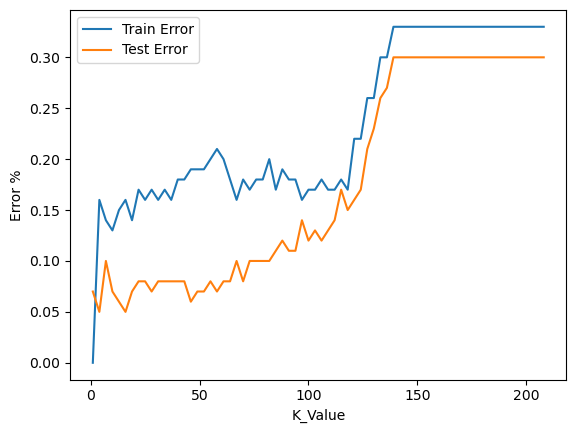

The optimal K (k*) =  4
The optimal K (k*) has the lowest test error of:  0.05
The optimal K (k*) true negative(s) value is:  27
The optimal K (k*) false positive(s) value is:  3
The optimal K (k*) false negative(s) value is:  2
The optimal K (k*) true positive(s) value is:  68
The optimal K (k*) class report: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.96      0.97      0.96        70

    accuracy                           0.95       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100



In [7]:

plt.plot(k_value_list,train_err_set,label="Train Error")
plt.plot(k_value_list,test_err_set,label="Test Error")
plt.xlabel('K_Value')
plt.ylabel('Error %')

plt.legend()
plt.show()



minTestErr = min(k_value_err.values())
for key,value in k_value_err.items():
    
    if value == minTestErr:
        OptimalK = key
Optimal_confusion = conf_dict[OptimalK]
Optimal_class_report = class_report_dict[OptimalK]
print("The optimal K (k*) = ",OptimalK)
print("The optimal K (k*) has the lowest test error of: ",minTestErr)
print("The optimal K (k*) true negative(s) value is: ",Optimal_confusion[0][0])
print("The optimal K (k*) false positive(s) value is: ",Optimal_confusion[0][1])
print("The optimal K (k*) false negative(s) value is: ",Optimal_confusion[1][0])
print("The optimal K (k*) true positive(s) value is: ",Optimal_confusion[1][1])
print("The optimal K (k*) class report: \n",Optimal_class_report)




#### iii. Learning Curve

{10: 0.22, 20: 0.22, 30: 0.29, 40: 0.29, 50: 0.27, 60: 0.29, 70: 0.28, 80: 0.28, 90: 0.27, 100: 0.22, 110: 0.16, 120: 0.13, 130: 0.1, 140: 0.08, 150: 0.07, 160: 0.07, 170: 0.07, 180: 0.06, 190: 0.05, 200: 0.05}
[0.22, 0.22, 0.29, 0.29, 0.27, 0.29, 0.28, 0.28, 0.27, 0.22, 0.16, 0.13, 0.1, 0.08, 0.07, 0.07, 0.07, 0.06, 0.05, 0.05]


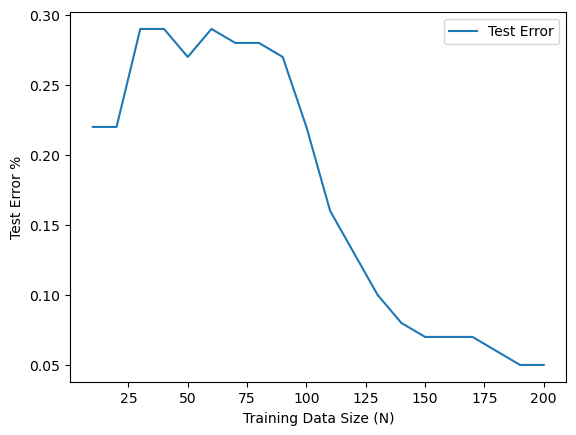

In [8]:
import math
group = trainData.groupby('class')
# print(trainData)
value_of_N = []
train_err_set = []
test_err_set = []
k_dict = {}
for i in range(10,210,10):
    value_of_N.append(i)
    newNorm =  group.get_group(0).head(math.floor(i/3))
    newAbnorm = group.get_group(1).head((i - math.floor(i/3)))
    newTrain = pd.concat([pd.DataFrame(newNorm),pd.DataFrame(newAbnorm)])
# print(newTrain)
    train_err = 100
    test_err = 100
    for k in range(1,i,5):
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(newTrain,newTrain['class'])
        #knn.predict(pd.DataFrame(dataframee))


#         actual_class_val = pd.DataFrame(dataframee['class'])

#         prediction_test = knn.predict(pd.DataFrame(dataframee))

#         cf_result = confusion_matrix(actual_class_val,prediction_test)

#         print(cf_result)

#         print(classification_report(actual_class_val,prediction_test))
        test_pred = knn.predict(dataframee)


        # print(test_pred)
        # print(np.array(dataframee['class']))
        test_acc = np.mean(np.array(dataframee['class']) == np.array(test_pred)) 
    #     print(test_acc)
        if round(1-test_acc,2) < test_err:
            test_err = round(1-test_acc,2)
            k_dict[i]=test_err
#         test_err = round(1- test_acc,2)
    #     print("This is the testing error: ",test_err)
    

        train_acc = knn.score(newTrain,newTrain['class'])
    #     print(train_acc)
        #train_err = round(1-train_acc,2)
        if round(1-train_acc,2) < train_err:
            train_err = round(1-train_acc,2)
    #     print("This is the training error: ",train_err)
    train_err_set.append(train_err)
    test_err_set.append(test_err)
    


#     print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
#     print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
#     print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
# print(trainData)
# print(train_err_set)
# print("break_________________________________________________")
# print("break_________________________________________________")
# print("break_________________________________________________")
# print("break_________________________________________________")
print(k_dict)
print(test_err_set)
#print(k_value_list)
# pd.DataFrame(dataframee)
plt.plot(value_of_N,test_err_set,label="Test Error")
#plt.plot(k_value_list,test_err_set,label="Test")
plt.xlabel('Training Data Size (N)')
plt.ylabel('Test Error %')

plt.legend()
plt.show()


### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [9]:
# print(trainData)
# print(dataframee)

# get the optimal k from the now minkowski
'''
Create a dictionary
associate lowest test_err with k values
pull lowest k_val associated with test_err
'''


test_err_set = []
train_err_set = []
KV_TR = {}
counter = 0
for k in range(1,200,5):
    test_err = 100
    train_err = 100
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=1)
    knn.fit(trainData,trainData['class'])
    
    y_predict = knn.predict(dataframee)
    test_acc = np.mean(np.array(dataframee['class']) == np.array(y_predict))
#     for i in range(len(np.array(dataframee['class']))):
#         if np.array(dataframee['class'])[i] == np.array(y_predict)[i]:
#             counter = counter + 1
            
   
    test_err = round(1-test_acc,2)
    KV_TR[k] = (test_err)

print(KV_TR)
#print("k=k* when p=1, metric is set to minkowski, and k = 6")
optimal_k_err = 100

for key in KV_TR:
    
    if KV_TR[key] < optimal_k_err:
        optimal_k_err = KV_TR[key]
        optimal_k_val = key
        
print("This is the optimal k val err rate",optimal_k_err)
print("Optimal K Value (k*) = ",optimal_k_val)
pd.DataFrame.from_dict(KV_TR,orient="index",columns=["K:      Test Error Rate"])

{1: 0.07, 6: 0.06, 11: 0.09, 16: 0.07, 21: 0.07, 26: 0.07, 31: 0.07, 36: 0.07, 41: 0.07, 46: 0.07, 51: 0.08, 56: 0.08, 61: 0.07, 66: 0.09, 71: 0.09, 76: 0.09, 81: 0.08, 86: 0.1, 91: 0.12, 96: 0.14, 101: 0.14, 106: 0.14, 111: 0.15, 116: 0.14, 121: 0.19, 126: 0.21, 131: 0.26, 136: 0.27, 141: 0.3, 146: 0.3, 151: 0.3, 156: 0.3, 161: 0.3, 166: 0.3, 171: 0.3, 176: 0.3, 181: 0.3, 186: 0.3, 191: 0.3, 196: 0.3}
This is the optimal k val err rate 0.06
Optimal K Value (k*) =  6


,K: Test Error Rate
1,0.07
6,0.06
11,0.09
16,0.07
21,0.07
26,0.07
31,0.07
36,0.07
41,0.07
46,0.07


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [10]:
p_values_err = {}
for i in np.arange(.1,1.1,.1):
    test_err = 100
    train_err = 100
    knn = KNeighborsClassifier(n_neighbors=6, metric='minkowski',p=(10**i))
    knn.fit(trainData,trainData['class'])
    y_predict = knn.predict(dataframee)
    test_acc = np.mean(np.array(dataframee['class']) == np.array(y_predict))
    test_err = round(1-test_acc,2)
    p_values_err[i] = test_err
print(p_values_err)
optimal_p_err = 100
optimal_p_val = 0
for key in p_values_err:
    
    if  p_values_err[key] < optimal_p_err:
        optimal_p_err = p_values_err[key]
        optimal_p_val = key
print("The optimal p value is ",optimal_p_val)
print("This produces the lowest test error rate at ", optimal_p_err)
pd.DataFrame.from_dict(p_values_err,orient="index",columns=["P-Value ->      Test Error Rate"])

{0.1: 0.06, 0.2: 0.05, 0.30000000000000004: 0.07, 0.4: 0.06, 0.5: 0.07, 0.6: 0.07, 0.7000000000000001: 0.07, 0.8: 0.07, 0.9: 0.06, 1.0: 0.07}
The optimal p value is  0.2
This produces the lowest test error rate at  0.05


,P-Value -> Test Error Rate
0.1,0.06
0.2,0.05
0.3,0.07
0.4,0.06
0.5,0.07
0.6,0.07
0.7,0.07
0.8,0.07
0.9,0.06
1.0,0.07


##### C. Chebyshev Distance With p -> infinity.

In [11]:
# print(trainData)
# print(dataframee)

# get the optimal k from the now minkowski
'''
Create a dictionary
associate lowest test_err with k values
pull lowest k_val associated with test_err
'''

inf = np.inf
test_err_set = []
train_err_set = []
KV_TR2 = {}
counter = 0

test_err = 100
train_err = 100
knn = KNeighborsClassifier(n_neighbors=6, metric='chebyshev')
knn.fit(trainData,trainData['class'])

y_predict = knn.predict(dataframee)
test_acc = np.mean(np.array(dataframee['class']) == np.array(y_predict))

test_err = round(1-test_acc,2)
KV_TR2[k] = test_err

print(KV_TR2)

optimal_k_err = 100

for key in KV_TR2:
    
    if KV_TR2[key] < optimal_k_err:
        optimal_k_err = KV_TR2[key]
        optimal_k_val = key
        
print("This is the optimal k val err rate",optimal_k_err)


{196: 0.06}
This is the optimal k val err rate 0.06


#### ii. Mahalanobis Distance.

In [12]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

inf = np.inf
test_err_set = []
train_err_set = []
KV_TR2 = {}
counter = 0
pd.DataFrame(trainData)


features_set = pd.DataFrame(trainData).drop('class',axis=1)

for k in range(1,200,5):
    test_err = 100
    train_err = 100
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(features_set, rowvar=False))})
    knn.fit(features_set, trainData['class'])
    y_predict = knn.predict(pd.DataFrame(dataframee).drop('class',axis=1))
    test_acc = np.mean(np.array(dataframee['class']) == np.array(y_predict))

    test_err = round(1-test_acc,2)
    KV_TR2[k] = test_err

print(KV_TR2)

optimal_k_err = 100

for key in KV_TR2:
    
    if KV_TR2[key] < optimal_k_err:
        optimal_k_err = KV_TR2[key]
        optimal_k_val = key
        
print("This is the optimal k val err rate",optimal_k_err)
print("Optimal K Value (k*) = ",optimal_k_val)
pd.DataFrame.from_dict(KV_TR2,orient="index",columns=["K:      Test Error Rate"])

{1: 0.25, 6: 0.16, 11: 0.19, 16: 0.16, 21: 0.17, 26: 0.16, 31: 0.19, 36: 0.17, 41: 0.18, 46: 0.17, 51: 0.18, 56: 0.17, 61: 0.17, 66: 0.17, 71: 0.15, 76: 0.16, 81: 0.17, 86: 0.17, 91: 0.18, 96: 0.19, 101: 0.2, 106: 0.22, 111: 0.25, 116: 0.25, 121: 0.28, 126: 0.3, 131: 0.3, 136: 0.3, 141: 0.3, 146: 0.3, 151: 0.3, 156: 0.3, 161: 0.3, 166: 0.3, 171: 0.3, 176: 0.3, 181: 0.3, 186: 0.3, 191: 0.3, 196: 0.3}
This is the optimal k val err rate 0.15
Optimal K Value (k*) =  71


,K: Test Error Rate
1,0.25
6,0.16
11,0.19
16,0.16
21,0.17
26,0.16
31,0.19
36,0.17
41,0.18
46,0.17


### (e) Weighted Decision

In [13]:
# print(trainData)
# print(dataframee)


inf = np.inf
test_err_set = []
train_err_set = []
KV_TR2 = {}
counter = 0
for k in range(1,200,5):
    test_err = 100
    train_err = 100
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean',weights='distance')
    knn.fit(trainData,trainData['class'])
    
    y_predict = knn.predict(dataframee)
    test_acc = np.mean(np.array(dataframee['class']) == np.array(y_predict))

    test_err = round(1-test_acc,2)
    KV_TR2[k] = test_err

# print(KV_TR2)

optimal_k_err = 100

for key in KV_TR2:
    
    if KV_TR2[key] < optimal_k_err:
        optimal_k_err = KV_TR2[key]
        optimal_k_val = key
print("<------------------------------Euclidean Weighted Decision------------------------------>")   
print("This is the optimal k val err rate",optimal_k_err)
print("Optimal K Value (k*) = ",optimal_k_val)

# print(trainData)
# print(dataframee)

# get the optimal k from the now minkowski
'''
Create a dictionary
associate lowest test_err with k values
pull lowest k_val associated with test_err
'''

inf = np.inf
test_err_set = []
train_err_set = []
KV_TR2 = {}
counter = 0
for k in range(1,200,5):
    test_err = 100
    train_err = 100
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=1,weights='distance')
    knn.fit(trainData,trainData['class'])
    
    y_predict = knn.predict(dataframee)
    test_acc = np.mean(np.array(dataframee['class']) == np.array(y_predict))

    test_err = round(1-test_acc,2)
    KV_TR2[k] = test_err

# print(KV_TR2)

optimal_k_err = 100

for key in KV_TR2:
    
    if KV_TR2[key] < optimal_k_err:
        optimal_k_err = KV_TR2[key]
        optimal_k_val = key
print("<------------------------------Manhattan Weighted Decision------------------------------>")   
print("This is the optimal k val err rate",optimal_k_err)
print("Optimal K Value (k*) = ",optimal_k_val)

# print(trainData)
# print(dataframee)

# get the optimal k from the now minkowski
'''
Create a dictionary
associate lowest test_err with k values
pull lowest k_val associated with test_err
'''

inf = np.inf
test_err_set = []
train_err_set = []
KV_TR2 = {}
counter = 0
for k in range(1,200,5):
    test_err = 100
    train_err = 100
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev',weights='distance')
    knn.fit(trainData,trainData['class'])
    
    y_predict = knn.predict(dataframee)
    test_acc = np.mean(np.array(dataframee['class']) == np.array(y_predict))

    test_err = round(1-test_acc,2)
    KV_TR2[k] = test_err

# print(KV_TR2)

optimal_k_err = 100

for key in KV_TR2:
    
    if KV_TR2[key] < optimal_k_err:
        optimal_k_err = KV_TR2[key]
        optimal_k_val = key
print("<------------------------------Chebyshev Weighted Decision------------------------------>")        
print("This is the optimal k val err rate",optimal_k_err)
print("Optimal K Value (k*) = ",optimal_k_val)

<------------------------------Euclidean Weighted Decision------------------------------>
This is the optimal k val err rate 0.06
Optimal K Value (k*) =  16
<------------------------------Manhattan Weighted Decision------------------------------>
This is the optimal k val err rate 0.05
Optimal K Value (k*) =  6
<------------------------------Chebyshev Weighted Decision------------------------------>
This is the optimal k val err rate 0.05
Optimal K Value (k*) =  36


### (f) Training Error Rate

The lowest Training Error rate achieved in this homework is 0.0%. Below I have included an example of "proof" that outputs the training error rate for the euclidean-metric based k-nearest-neighbor. The output essentially is a dictionary with key's representing training sample-size and values representing training error. As we can see all values are 0.0.


In [14]:
import math
group = trainData.groupby('class')
# print(trainData)
value_of_N = []
train_err_set = []
test_err_set = []
k_dict = {}
for i in range(10,210,10):
    value_of_N.append(i)
    newNorm =  group.get_group(0).head(math.floor(i/3))
    newAbnorm = group.get_group(1).head((i - math.floor(i/3)))
    newTrain = pd.concat([pd.DataFrame(newNorm),pd.DataFrame(newAbnorm)])
# print(newTrain)
    train_err = 100
    test_err = 100
    for k in range(1,i,5):
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(newTrain,newTrain['class'])
        #knn.predict(pd.DataFrame(dataframee))


#         actual_class_val = pd.DataFrame(dataframee['class'])

#         prediction_test = knn.predict(pd.DataFrame(dataframee))

#         cf_result = confusion_matrix(actual_class_val,prediction_test)

#         print(cf_result)

#         print(classification_report(actual_class_val,prediction_test))
        test_pred = knn.predict(dataframee)


        # print(test_pred)
        # print(np.array(dataframee['class']))
        test_acc = np.mean(np.array(dataframee['class']) == np.array(test_pred)) 
    #     print(test_acc)
        if round(1-test_acc,2) < test_err:
            test_err = round(1-test_acc,2)
            
#         test_err = round(1- test_acc,2)
    #     print("This is the testing error: ",test_err)
    

        train_acc = knn.score(newTrain,newTrain['class'])
    #     print(train_acc)
        #train_err = round(1-train_acc,2)
        if round(1-train_acc,2) < train_err:
            train_err = round(1-train_acc,2)
            k_dict[i]=train_err
    #     print("This is the training error: ",train_err)
    train_err_set.append(train_err)
    test_err_set.append(test_err)
    


print(k_dict)


{10: 0.0, 20: 0.0, 30: 0.0, 40: 0.0, 50: 0.0, 60: 0.0, 70: 0.0, 80: 0.0, 90: 0.0, 100: 0.0, 110: 0.0, 120: 0.0, 130: 0.0, 140: 0.0, 150: 0.0, 160: 0.0, 170: 0.0, 180: 0.0, 190: 0.0, 200: 0.0}
